In [1]:
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

import mimetypes
import urllib
import os


from google.colab import drive	
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/heat/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [18]:
class heat_map:
    # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  # check the available file name
  # if the input file name already existed then rename to file_1, file_2
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
      file_name_new=file_name
      if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
          file_name_new=file_name+'_'+str(n[0])
          n[0]+=1
      if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
          file_name_new=check_meta(file_name)
      return file_name_new
    available_name=check_meta(filename)
    return available_name
  # file: file name of your data source
  # row_labels: the x axis labels
  # col_labels: the y axis labels
  # paper_type : 'single' or 'double'
  def heat(self, file, row_labels, col_labels, paper_type, **kwargs):
    # Configuration of the heatmap
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # my_font: the typeface of x, y labels
    # labeltext_size: text size of x,y labels
    # labelpad: pad size of label
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # cmap： the color of heatmap
    # annotate: True or False, if true, the value will show in the heatmap
    # colorbar: True or False, if true, the color bar of heatmap will show
    # barlabel: the label of color bar
    # xlabel_rotate: the rotation of x axis labels
    # ylabel_rotate: the rotation of y axis labels
    # barlabel_rotate: the rotation of colorbar labels
    # x_label: the content of x label
    # y_label: the content of y label
    # annotate_textsize: the font size of annotation
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image
    single_column_conf={ 'plotwidth':8,
                      'plotheight':6, 
                      'my_font':'DejaVu Sans',
                      'labeltext_size':20,
                      'labelpad':10,
                      'title':False,
                      'title_pad':10,
                      'title_size':20,
                      'title_loc':'center', 
                      'cmap':'GnBu',
                      'alpha':0.9,
                      'annotate':True,
                      'colorbar':True,
                      'barlabel':None,
                      'xlabel_rotate':45,
                      'ylabel_rotate':0,
                      'barlabel_rotate':-90,
                      'x_label':None,
                      'y_label':None,
                      'annotate_textsize':13,
                      'save_image':False,
                      'savefig_bbox_inches':'tight',
                      'file_name':'heatmap'
    }

    double_column_conf={ 'plotwidth':8,
                      'plotheight':6,
                      'my_font':'DejaVu Sans',
                      'backgrid':True,
                      'isframe':True,
                      'labeltext_size':22,
                      'labelpad':10,
                      'title':False,
                      'title_pad':10,
                      'title_size':22,
                      'title_loc':'center', 
                      'cmap':'GnBu',
                      'alpha':0.9,
                      'annotate':True,
                      'colorbar':True,
                      'barlabel':None,
                      'xlabel_rotate':45,
                      'ylabel_rotate':0,
                      'barlabel_rotate':-90,
                      'x_label':None,
                      'y_label':None,
                      'annotate_textsize':12,
                      'save_image':False,
                      'savefig_bbox_inches':'tight',
                      'file_name':'heatmap'
    }

    # choose a configuration
    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf  

    # when new configuraton is set, update the original one
    conf.update(kwargs)  
    # create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))

    # x,y label setting                   
    ax_left.set_xlabel(conf['x_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax_left.set_ylabel(conf['y_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    
    # read file 
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name')
    

    # plot
    # find the row_label
    if row_labels not in list(data.columns):
      k=''
      for i in data.columns:
        if set(row_labels) <= set(data[i].values): 
          k=i
        else:
          pass

      data=data.set_index(k)
      data.index.name=None
    # plot heatmap        
    im=ax_left.imshow(data,cmap=conf['cmap'],alpha=conf['alpha'])
    ax_left.set_xticks(np.arange(len(data.columns)))
    ax_left.set_yticks(np.arange(len(data.index)))
    # and label them with the respective list entries
    ax_left.set_xticklabels(data.columns,fontsize=conf['labeltext_size'])
    ax_left.set_yticklabels(data.index,fontsize=conf['labeltext_size'])
    # rotate x, y axis
    plt.setp(ax_left.get_xticklabels(), rotation=conf['xlabel_rotate'], ha="right",
          rotation_mode="anchor")
    plt.setp(ax_left.get_yticklabels(), rotation=conf['ylabel_rotate'], ha="right",
          rotation_mode="anchor")
    # if colorbar is true, draw color bar
    if conf['colorbar'] == True:
      cbar = ax_left.figure.colorbar(im, ax=ax_left)
      cbar.ax.tick_params(labelsize=conf['labeltext_size'])
      if conf['barlabel'] != None:
        cbar.ax.set_ylabel(conf['barlabel'], rotation=conf['barlabel_rotate'], va="bottom",fontsize=conf['labeltext_size'])
    # define an annotate function
    # the default format is .2f
    # if the background color is light the font color will be black, else, the font color will be white
    def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
      if not isinstance(data, (list, np.ndarray)):
          data = im.get_array()
      # get the boundary threshold （use 1/2 of max)
      if threshold is not None:
        threshold = im.norm(threshold)
      else:
        threshold = im.norm(data.max())/2.
      # set the position of annotation  
      kw = dict(horizontalalignment="center",
                  verticalalignment="center")
      kw.update(textkw)

      if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
      texts = []
      # get the colored annotate font
      for i in range(data.shape[0]):
        for j in range(data.shape[1]):
          kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
          text = im.axes.text(j, i, valfmt(data[i, j]), fontsize=conf['annotate_textsize'],**kw)
          texts.append(text)
      return texts

    if conf['annotate'] == True:
      texts = annotate_heatmap(im, valfmt="{x:.1f}")
    # title setting
    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])
    # save image setting
    if conf['save_image'] == True:
      file_name=conf['file_name']
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches'],dpi=600,format='jpg') 

    plt.show()

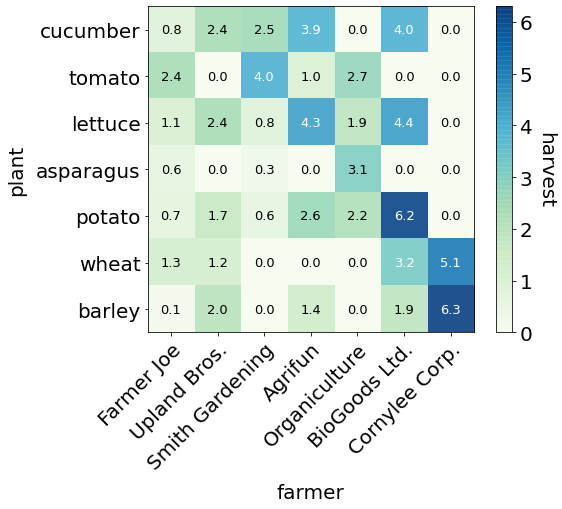

In [20]:
# heatmap with annotation and colorbar
h2=heat_map()
h2.heat(file='1.xlsx',row_labels=["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"],col_labels=["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."],x_label='farmer',y_label='plant',paper_type='single',barlabel='harvest',save_image=True,file_name='heatmap')